## Adagrad, RMSprop, and Adam optimizers using GD

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
X = np.linspace(0, 20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a, b = -1, 2
y = a*X + b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

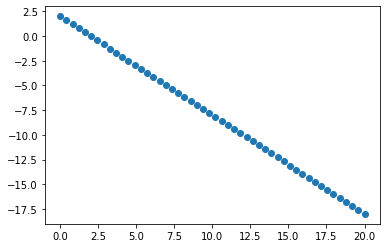

In [4]:
plt.scatter(X, y)

In [5]:
def plots(iterations, costs, thetas_0, thetas_1):
    plt.plot(np.linspace(1,iterations,num=iterations), costs)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.show()
    plt.plot(thetas_0, costs)
    plt.xlabel('theta 0')
    plt.ylabel('Loss')
    plt.title('Theta 0')
    plt.show()
    plt.plot(thetas_1, costs)
    plt.xlabel('theta 1')
    plt.ylabel('Loss')
    plt.title('Theta 1')
    plt.show()

In [6]:
def plot_regression_lines(thetas_0, thetas_1, iterations):
    for i in range(iterations):
        hypothesis = thetas_0[i] + (thetas_1[i] * X)
        plt.scatter(X, y)
        plt.plot(X, hypothesis)

In [7]:
def plot_best_line(theta_0, theta_1):
    hypothesis = theta_0 + (theta_1 * X)
    plt.scatter(X, y)
    plt.plot(X, hypothesis, 'r')

In [8]:
def calc_r2(theta_0, theta_1):
    hypothesis = theta_0 + (theta_1 * X)
    from sklearn.metrics import r2_score
    return r2_score(y, hypothesis)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.


In [9]:
def ada_grad(X, y, alpha, epsilon, iterations):
    
    theta_0, theta_1, v_t_0, v_t_1 = 0, 0, 0, 0
    m = X.shape[0]
    hypotheses = []
    
    gradient = [1, 0]
    
    costs, thetas_0, thetas_1 = [], [], []
    
    for i in range(iterations):
            actual_iter = i + 1
            
            # Calculate current prediction
            hypothesis = theta_0 + (theta_1 * X)
            hypotheses.append(hypothesis)

            # Calculate gradient for current theta0, theta1
            error = hypothesis - y
            gradient[0] = (1/m) * np.sum(error)
            gradient[1] = (1/m) * error@X
            
            # Calculate accumulated gradient
            v_t_0 = v_t_0 + gradient[0]**2
            v_t_1 = v_t_1 + gradient[1]**2

            
            # Update theta0, theta1
            theta_0 = theta_0 - (alpha / (np.sqrt(v_t_0) + epsilon))*gradient[0]
            theta_1 = theta_1 - (alpha / (np.sqrt(v_t_1) + epsilon))*gradient[1]

            # Calculate loss for current theta0, theta1
            cost = (1/(2*m)) * ((np.linalg.norm(hypothesis - y))**2)
            costs.append(cost)
            
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            
            # Stop when gradient values is less than 0.01
            if(abs(gradient[0])<0.01 and abs(gradient[1])<0.01): break
            
    return costs, thetas_0, thetas_1, thetas_0[-1], thetas_1[-1], hypotheses, actual_iter

R2 score:  0.5975613614320027


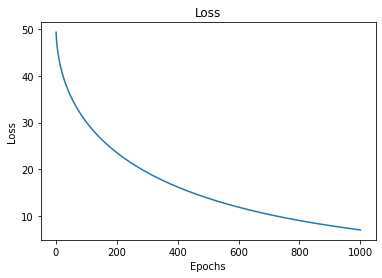

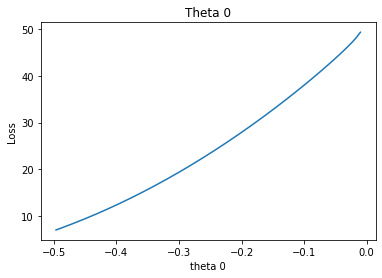

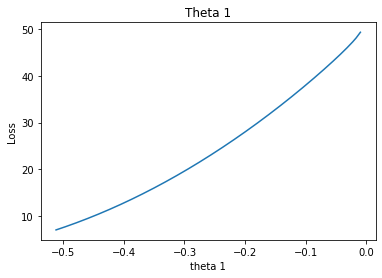

In [10]:
alpha = 0.01
epsilon = 1e-8
iterations = 1000
costs_ag, thetas_0_ag, thetas_1_ag, best_theta_0ag, best_theta_1ag, preds_ag, actual_iter = ada_grad(X, y, alpha, epsilon, iterations)
print('R2 score: ', calc_r2(best_theta_0ag, best_theta_1ag))
plots(actual_iter, costs_ag, thetas_0_ag, thetas_1_ag)

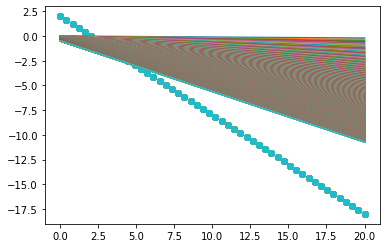

In [11]:
plot_regression_lines(thetas_0_ag, thetas_1_ag, actual_iter)

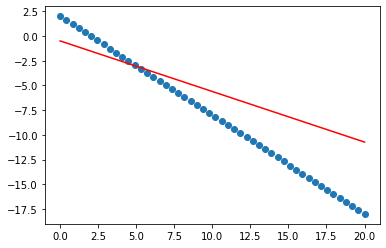

In [12]:
plot_best_line(best_theta_0ag, best_theta_1ag)

R2 score:  0.9999880772265083


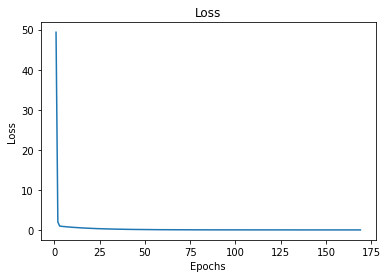

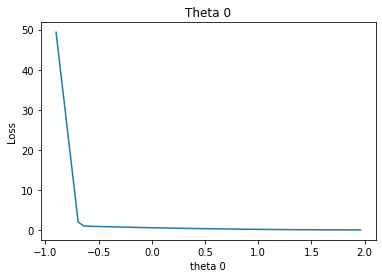

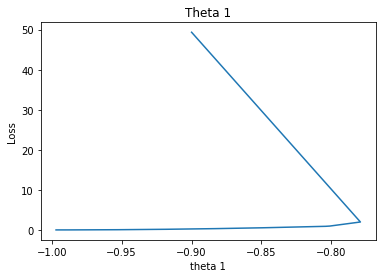

In [13]:
alpha = 0.9
epsilon = 1e-8
iterations = 1000
costs_ag, thetas_0_ag, thetas_1_ag, best_theta_0ag, best_theta_1ag, preds_ag, actual_iter = ada_grad(X, y, alpha, epsilon, iterations)
print('R2 score: ', calc_r2(best_theta_0ag, best_theta_1ag))
plots(actual_iter, costs_ag, thetas_0_ag, thetas_1_ag)

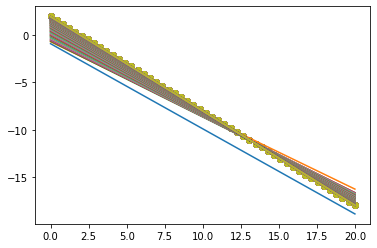

In [14]:
plot_regression_lines(thetas_0_ag, thetas_1_ag, actual_iter)

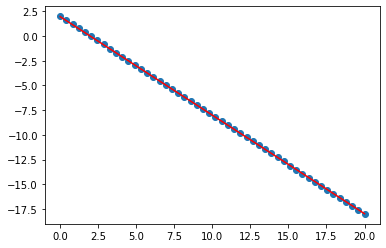

In [15]:
plot_best_line(best_theta_0ag, best_theta_1ag)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.


In [16]:
def rms_prop(X, y, alpha, beta, epsilon, iterations):
    
    theta_0, theta_1 = 0, 0
    v_t_0, v_t_1 = 0, 0
    m = X.shape[0]
    gradient = [0, 0]
    costs, thetas_0, thetas_1 = [], [], []
    hypotheses = []
    
    for i in range(iterations):
        actual_iter = i+1
        
        # Calculate current prediction
        hypothesis = theta_0 + (theta_1 * X)
        hypotheses.append(hypothesis)
        
        # Calculate gradient for current theta0, theta1
        error = hypothesis - y
        gradient[0] = (1/m)*np.sum(error)
        gradient[1] = (1/m)*error@X
        
        # Calculate weighted gradient
        v_t_0 = beta * v_t_0 + (1-beta)*gradient[0]**2
        v_t_1 = beta * v_t_1 + (1-beta)*gradient[1]**2
        
        # Update theta0, theta1
        theta_0 = theta_0 - (alpha / (np.sqrt(v_t_0) + epsilon))*gradient[0]
        theta_1 = theta_1 - (alpha / (np.sqrt(v_t_1) + epsilon))*gradient[1]
        
        # Calculate loss for current theta0, theta1
        cost = (1/(2*m)) * ((np.linalg.norm(hypothesis - y))**2)
        costs.append(cost)
        
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
        # Stop when gradient values is less than 0.01
        if(abs(gradient[0])<0.01 and abs(gradient[1])<0.01): break
    return costs, thetas_0, thetas_1, thetas_0[-1], thetas_1[-1], hypotheses, actual_iter

R2 score:  0.09125147110705933


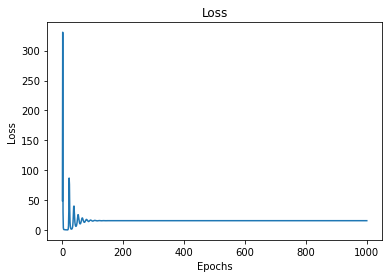

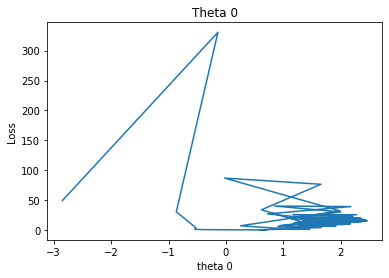

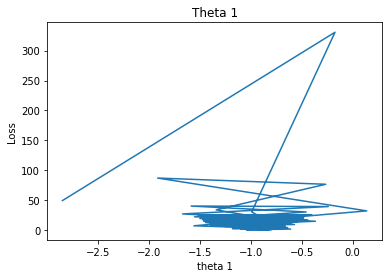

In [17]:
alpha = 0.9
beta = 0.9
epsilon = 1e-8
iterations = 1000
costs_rms, thetas_0_rms, thetas_1_rms, best_theta_0rms, best_theta_1rms, preds_rms, actual_iter = rms_prop(X, y, alpha, beta, epsilon, iterations)
print('R2 score: ', calc_r2(best_theta_0rms, best_theta_1rms))
plots(actual_iter, costs_rms, thetas_0_rms, thetas_1_rms)

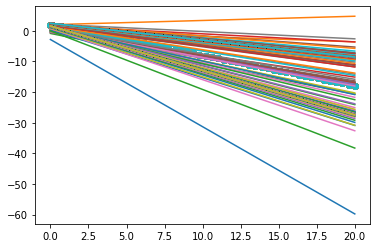

In [18]:
plot_regression_lines(thetas_0_rms, thetas_1_rms, actual_iter)

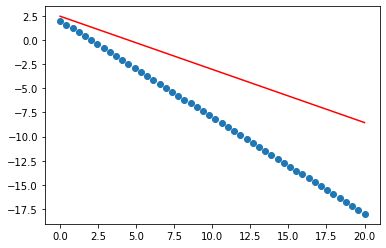

In [19]:
plot_best_line(best_theta_0rms, best_theta_1rms)

R2 score:  0.9999887277257362


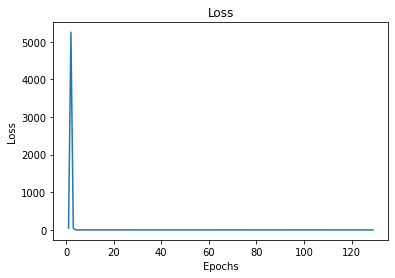

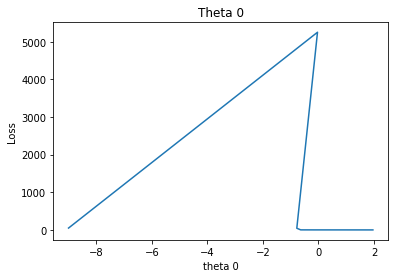

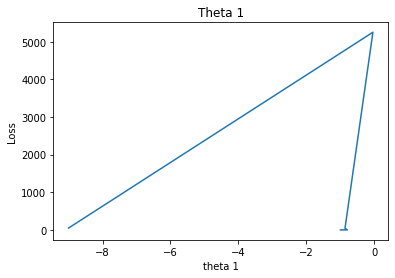

In [20]:
alpha = 0.9
beta = 0.99
epsilon = 1e-8
iterations = 1000
costs_rms, thetas_0_rms, thetas_1_rms, best_theta_0rms, best_theta_1rms, preds_rms, actual_iter = rms_prop(X, y, alpha, beta, epsilon, iterations)
print('R2 score: ', calc_r2(best_theta_0rms, best_theta_1rms))
plots(actual_iter, costs_rms, thetas_0_rms, thetas_1_rms)

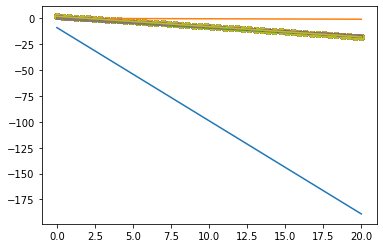

In [21]:
plot_regression_lines(thetas_0_rms, thetas_1_rms, actual_iter)

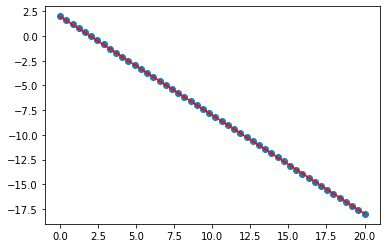

In [22]:
plot_best_line(best_theta_0rms, best_theta_1rms)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.


In [23]:
def adam(X, y, alpha, beta1, beta2, epsilon, iterations):
    
    theta_0, theta_1 = 0, 0
    v_t_0, v_t_1 = 0, 0
    m_t_0, m_t_1 = 0, 0
    m = X.shape[0]
    gradient = [0, 0]
    hypotheses = []
    
    costs, thetas_0, thetas_1 = [], [], []
    
    for i in range(iterations):
        
        actual_iter = i+1
        
        # Calculate current prediction
        hypothesis = theta_0 + (theta_1 * X)
        hypotheses.append(hypothesis)
        
        # Calculate gradient for current theta0, theta1
        error = hypothesis - y
        gradient[0] = (1/m) * np.sum(error)
        gradient[1] = (1/m) * (error@X)
            
        # Calculate weighted-momentum
        m_t_0 = (beta1 * m_t_0) + (1-beta1)*(gradient[0])
        m_t_1 = (beta1 * m_t_1) + (1-beta1)*(gradient[1])
        
        # Calculate accumulated-weighted gradient
        v_t_0 = (beta2 * v_t_0) + (1-beta2)*(gradient[0]**2)
        v_t_1 = (beta2 * v_t_1) + (1-beta2)*(gradient[1]**2)
        
        # Obiligatory Bias correction step
        m_t_0_correct = m_t_0 / (1 - beta1**(i+1))
        m_t_1_correct = m_t_1 / (1 - beta1**(i+1))
        
        v_t_0_correct = v_t_0 / (1 - beta2**(i+1))
        v_t_1_correct = v_t_1 / (1 - beta2**(i+1))
        
        # Update theta0, theta1 using both momentum and accumulated gradient
        theta_0 = theta_0 - (alpha / (np.sqrt(v_t_0_correct) + epsilon))*m_t_0_correct
        theta_1 = theta_1 - (alpha / (np.sqrt(v_t_1_correct) + epsilon))*m_t_1_correct
        
        # Calculate loss for current theta0, theta1
        cost = (1/(2*m)) * ((np.linalg.norm(hypothesis - y))**2)
        costs.append(cost)
        
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)

        # Stop when gradient values is less than 0.01
        if(abs(gradient[0]) < 0.01 and abs(gradient[1]) < 0.01): break
    return costs, thetas_0, thetas_1, thetas_0[-1], thetas_1[-1], hypotheses, actual_iter

R2 score:  0.3069071262555957


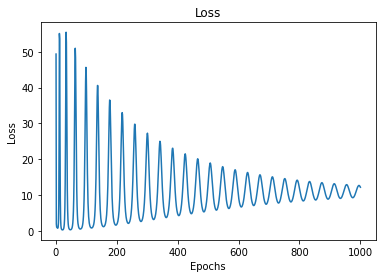

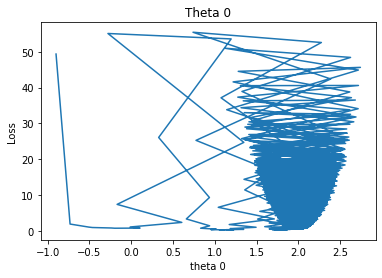

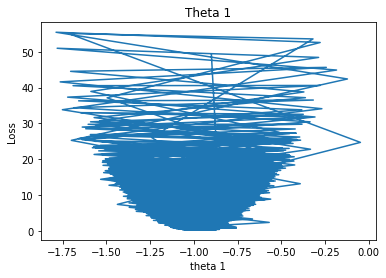

In [24]:
alpha = 0.9
beta1 = 0.09
beta2 = 0.99
epsilon = 1e-8
iterations = 1000
costs_a, thetas_0_a, thetas_1_a, best_theta_0a, best_theta_1a, preds_a, actual_iter = adam(X, y, alpha, beta1, beta2, epsilon, iterations)
print('R2 score: ', calc_r2(best_theta_0a, best_theta_1a))
plots(actual_iter, costs_a, thetas_0_a, thetas_1_a)

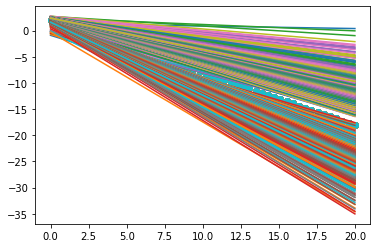

In [25]:
plot_regression_lines(thetas_0_a, thetas_1_a, actual_iter)

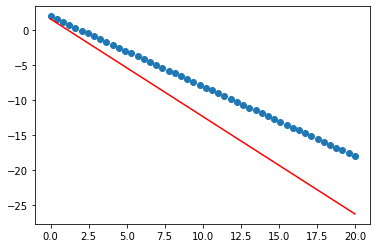

In [26]:
plot_best_line(best_theta_0a, best_theta_1a)

R2 score:  0.9999896222485719


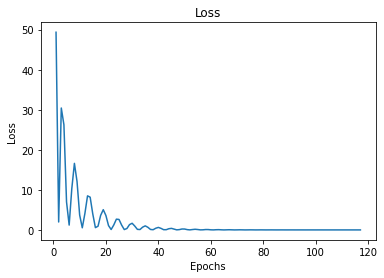

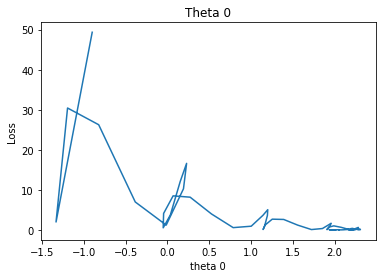

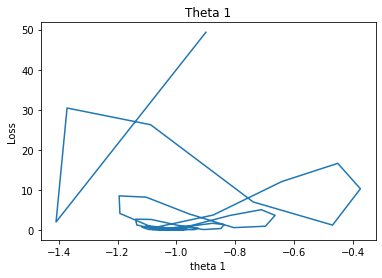

In [27]:
alpha = 0.9
beta1 = 0.9
beta2 = 0.99
epsilon = 1e-8
iterations = 1000
costs_a, thetas_0_a, thetas_1_a, best_theta_0a, best_theta_1a, preds_a, actual_iter = adam(X, y, alpha, beta1, beta2, epsilon, iterations)
print('R2 score: ', calc_r2(best_theta_0a, best_theta_1a))
plots(actual_iter, costs_a, thetas_0_a, thetas_1_a)

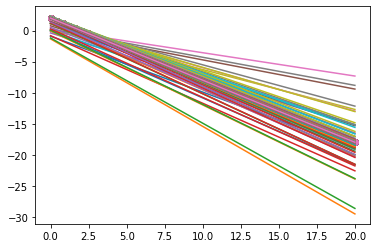

In [28]:
plot_regression_lines(thetas_0_a, thetas_1_a, actual_iter)

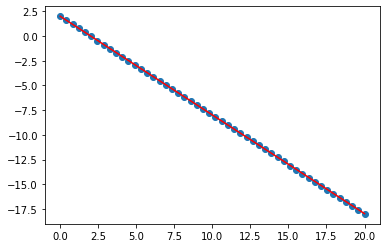

In [29]:
plot_best_line(best_theta_0a, best_theta_1a)

# Comparing all algorithms with values:-
## alpha = 0.9
## epsilon = 1e-8
## beta1 =0.9
## beta2 = 0.99
## Max iterations = 1000

R2 score:  0.9999880772265083


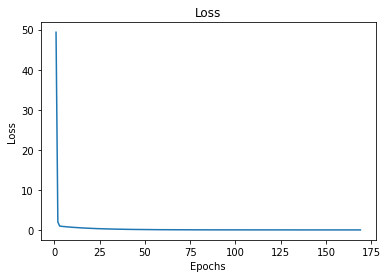

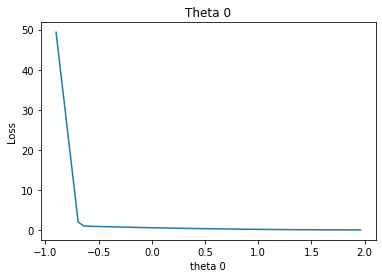

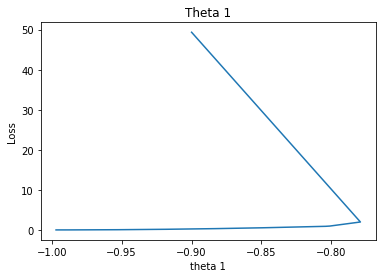

In [30]:
alpha = 0.9
epsilon = 1e-8
iterations = 1000
costs_ag, thetas_0_ag, thetas_1_ag, best_theta_0ag, best_theta_1ag, preds_ag, actual_iter = ada_grad(X, y, alpha, epsilon, iterations)
print('R2 score: ', calc_r2(best_theta_0ag, best_theta_1ag))
plots(actual_iter, costs_ag, thetas_0_ag, thetas_1_ag)

R2 score:  0.9999887277257362


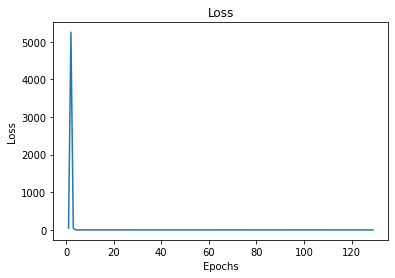

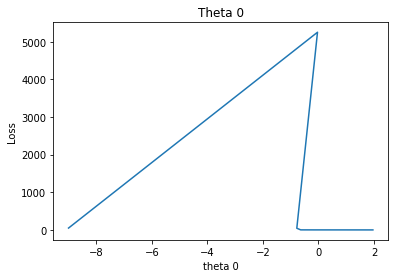

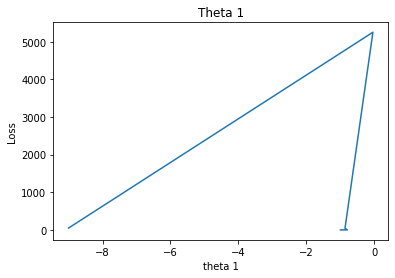

In [31]:
alpha = 0.9
beta = 0.99
epsilon = 1e-8
iterations = 1000
costs_rms, thetas_0_rms, thetas_1_rms, best_theta_0rms, best_theta_1rms, preds_rms, actual_iter = rms_prop(X, y, alpha, beta, epsilon, iterations)
print('R2 score: ', calc_r2(best_theta_0rms, best_theta_1rms))
plots(actual_iter, costs_rms, thetas_0_rms, thetas_1_rms)

R2 score:  0.9999896222485719


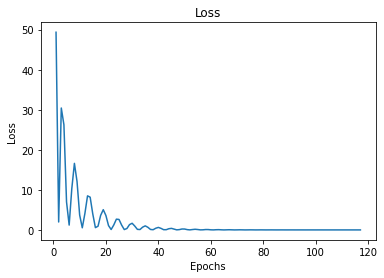

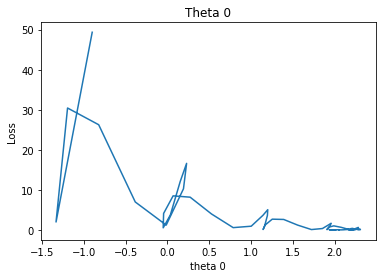

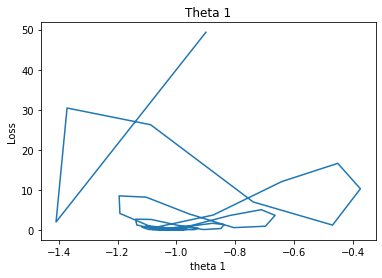

In [32]:
alpha = 0.9
beta1 = 0.9
beta2 = 0.99
epsilon = 1e-8
iterations = 1000
costs_a, thetas_0_a, thetas_1_a, best_theta_0a, best_theta_1a, preds_a, actual_iter = adam(X, y, alpha, beta1, beta2, epsilon, iterations)
print('R2 score: ', calc_r2(best_theta_0a, best_theta_1a))
plots(actual_iter, costs_a, thetas_0_a, thetas_1_a)

## Best line for the 3 algorithms

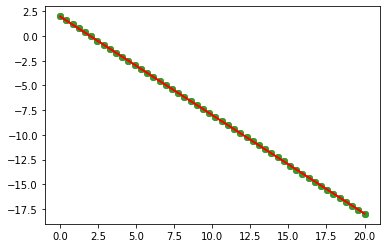

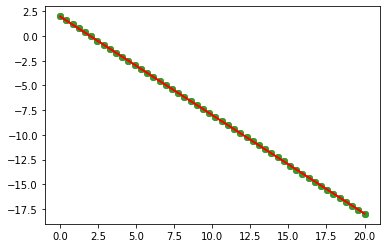

In [34]:
plot_best_line(best_theta_0ag, best_theta_1ag)
plot_best_line(best_theta_0rms, best_theta_1rms)
plot_best_line(best_theta_0a, best_theta_1a)